# Datasets


## Get the datasets of the bitcoins
We use pandas to read the csv formated datasets.


## Prerequisite

- First import all the packages needed.
- Load the datasets into the variable data_set.

In [39]:
#some initial code here, to help start the user.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
import math

data_set = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')

data_set.head()

# write your code here.

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


## Visualize the neccessary data which effect on market price of the bitcoins

btc_market_price is the needed data so visualize it.

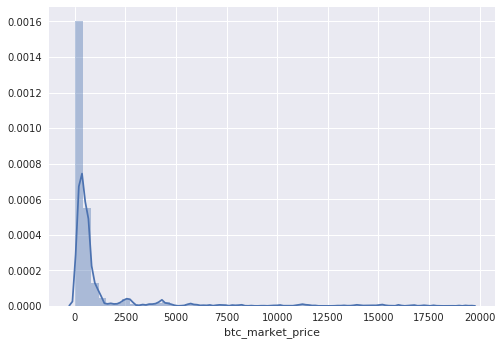

In [40]:
# this is the answer block, always use the code cell.

market_price = data_set[data_set['btc_market_price'].notnull()].btc_market_price
btc_market_price_plot = sns.distplot(market_price)

In [41]:
# code

# Scatter Plots or Joint plots using seaborn
To visualize how each factor would affect market price of bitcoins, we can run a scatter plot of the housing rate for each dependent variable. This will help visualize how the target vector may be affected by each factor. Later we shall study quantitave methods that can provide us methods to measure how each factor affects the output or if it doesnt affect the output at all.

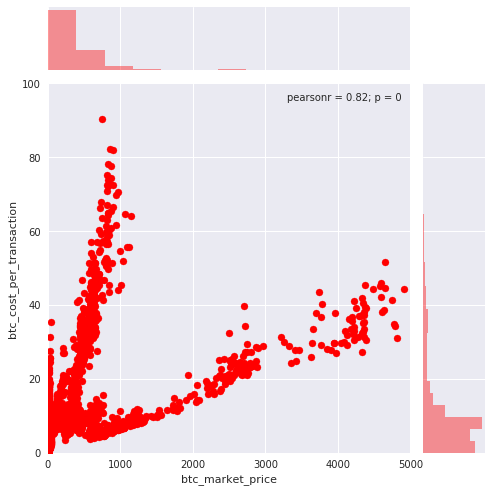

In [42]:
sns.jointplot("btc_market_price", "btc_cost_per_transaction", data=data_set, xlim=(0, 5000), ylim=(0, 100), color="r", size=7)

Lets try with another factor to get into deep of the data

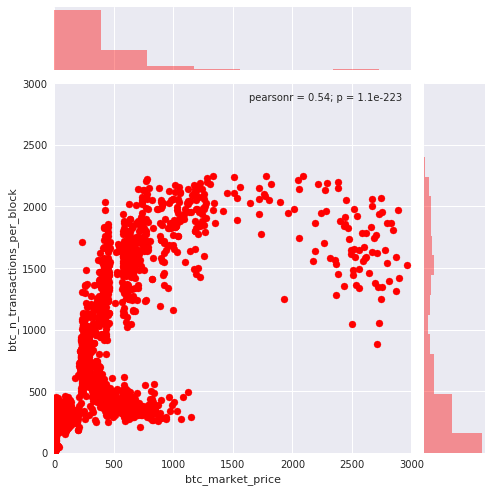

In [43]:
sns.jointplot("btc_market_price", "btc_n_transactions_per_block", data=data_set, xlim=(0, 3000), ylim=(0, 3000), color="r", size=7)

In [44]:
#code

# Categorical Variables 
The joint plots and scatter plots by default overlap the points and therefore to visualize density becomes a tough task, esp when such overlapping points are high in the map. To resolve this issue, you can set the flag called jitter to True which spreads high density of overlapping points.

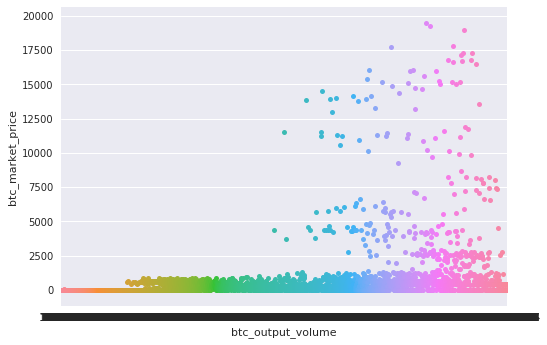

In [45]:
sns.stripplot(x="btc_output_volume", y="btc_market_price", data=data_set, jitter=True)

# Regression Using Statsmodels
Statsmodels is a library used widely for linear regression. The linear regression library has convenient ways to specify parameters for regression and hence is popularly used. The format to specify regression for a single variable is:

lm = sm.ols(formula = 'y ~ x')
where x is a dependent variable. Let us look at how housing rate is affected by crime rate.

lm = sm.ols(formula='btc_market_price ~ btc_total_bitcoins', data=data_set).fit()
This is called simple regression as only one variable affects the target variable. The above command trains the model lm with input as btc_total_bitcoins and target as btc_market_price. If many variables are involved in modeling the target, then it is called multiple linear regression.

To get prediction from the trained model:

y_hat = lm.predict(data_set[['btc_total_bitcoins']])

In [46]:
train_data = data_set[data_set['btc_total_bitcoins'].notnull()]

lm = sm.ols(formula = 'btc_market_price ~ btc_total_bitcoins', data=train_data).fit()
y_hat = lm.predict(train_data[['btc_total_bitcoins']])

mse_lm = mean_squared_error(train_data['btc_market_price'].values, y_hat)
print("MSE:",mse_lm)

MSE: 4529565.10254


In [47]:
#code

# Improving the fit - Multicollinearity
Many times, more than one input could be dependent on each other. In Linear Regression, the requirement is that all the input variables are independent of each other. When a feature is dependent on one or more of the other input features, it leads to a phenomenon known as multi-collinearity or correlation. This can be visualized by a heat map which shows the correlation between all the features. In the housing data, the heat map can be visualized by first calculating the correlation value.

correlations = data_set[features].corr()

In [48]:
features = data_set.columns
correlations = data_set[features].corr()
correlations

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,...,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,...,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,...,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,...,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


# Handling fit - Multicollinearity
One of the ways to handle multi-collinearity is to keep one of the correlated variables and remove the rest from the modeling.

In [49]:
train_data = train_data[train_data['btc_total_bitcoins'].notnull()]
train_data = train_data[train_data['btc_market_cap'].notnull()]
train_data = train_data[train_data['btc_trade_volume'].notnull()]
train_data = train_data[train_data['btc_blocks_size'].notnull()]
train_data = train_data[train_data['btc_cost_per_transaction'].notnull()]
train_data = train_data[train_data['btc_n_transactions'].notnull()]
train_data = train_data[train_data['btc_n_transactions_excluding_popular'].notnull()]